#### Final Proposal EDF 6938: Natural Langauge Processing

### Provide your title here 
> #### Author: Jennifer Lu
> #### Date: Dec 3, 2022
> #### Email: jie.lu@ufl.edu


#### 1. Introduction 

> Usability evaluation has garnered substantial attention in the field of Human-Computer Interaction (HCI). Consequently, methods and processes developed in this field are widely applied in the field of Learning Design and Technology (LDT) to evaluate the usability of educational and learning technologies, ignoring or overlooking fundamental differences between general information technologies and learning technologies. In particular, the latter is designed and developed with learning-specific features, such as pedagogical strategy and assessment. To this end, there exist questions and concerns regarding if applying usability instruments developed outside of the field of LDT to evaluate learning technologies. Examining usability constructs that have been the focus of existing instruments applied to learning technologies in the field of LDT becomes a good start to address and hopefully answer this question.

>In the fields of Machine Learning (ML) and Natural Language Processing (NLP), clustering or document clustering, is an effective technique that aims to organize documents into clusters. A range of methods for clustering have been proposed, including K-Means Clustering, Expectation-Maximization (EM) Clustering, and Mean-Shift Clustering. In the proposed study, of particular interest is the application of K-Means Clustering to organize a corpus of usability instruments, entried at an item level, into meaningful clusters.

>In this study, a K-means clustering approach is employed to examine focus of existing usability instruments that have been applied to learning technologies in the field of LDT. Methods, preliminary findings, and future directions are discussed.




#### 2. Related Work 

> Within the field of LDT, usability research is currently conducted using methods and processes drawn almost exclusively from HCI. Usability constructs measured in usability studies vary by the type of methods used. perceived usability seems to be the most prevalent outcome measure. For example, Nielsen’s Usability Heuristics is a widely accepted inspection method for evaluating the perceived usability of a given user interface. Other frequently used standardized measures such as the SUS (System Usability Scale) and the CSUQ (Computer System Usability Questionnaire), although evaluating constructs like learnability and interface quality, still focus on the perceived usability of the software in general. Satisfaction is the second most frequently assessed construct in usability studies conducted on educational and learning technologies. Following this are efficiency, operability, learnability, and aesthetics, which are usability metrics defined in the International Organization Standardization (ISO). Learning-related attributes such as content and assessment seem to be far less commonly evaluated usability constructs, which has signaled tensions about using instruments developed outside of the field of LDT to evaluate educational and learning technologies. To this end, research on what constructs have been the focus of usability instruments applied to evaluate learning technologies is needed.

>Document clustering has been applied in a variety of fields such as data mining and information retrieval. Methodologically speaking, clustering uses a range of rich algorithmic support which can be classified into two main types: (1) hierarchical-based and (2) partitioning-based. In specific, K-Means Clustering has been prevalent due to its low computation complexity. Although this approach has several limitations, it seems to be intuitive given the context of the study and the type of data collected for analysis. 


#### 3. Methods 

> The current study applied the unspervised learning algorithm, K-means clustering, to identify topics in a corpus of usbaility instruments extracted at an item level. 

#####3.1 Research Questions
>The purpose of the study is to explore topics of usability constructs measured by existing usability instruments that have been used in the field of LDT, regardless of in which field they were originally designed and developed. The overarching research question that guides this study is:

>RQ. What constructs of usability have been measured by existing usability instruments applied to evaluate educational and learning technologies?


######3.2 Data Collection

>A systematic literature review was conducted on usability research that analyzed outcome measures reported in empirical studies within the field of LDT in the past 20 years. In this systematic review, a range of usability instruments were identified that each item in each instrument was developed to measure a specific construct of usability. In the current study, these usability instruments were extracted and segmented into individual entries in a spreadsheet, which were used as the primary source for analysis.

#####3.3 K-means Clustering

>The unsupervised learning algorithm, K-Means Clustering, was used to identify topics by organizing the corpus of usability items into meaningful clusters. All computations were conducted using Python. In preparation for the data analysis, the raw data source was pre-processed. The selected model does not require a training set or a testing set. However, a pre-trained model was imported. The data set does not contain any missing values or categorical features which need to be taken care of otherwise. Pre-processing activities are listed as follows:

>1. Lowercasing all words.
2. Removing punctuations, common words, and stop words. An extended list of stop word dictionary will be used which helps remove words including “frequent”, “would”, “should”, etc.
3. Lemmatization.
4. Tokenization.

>The Word2Vec embedding technique was used to vectorize the data because it perserves the contexual meaning of words to the maximum degree. The "Scikit-learn" and "Gensim" libraries were imported and used. The elbow method and the silhouette analysis were used to determine the optimal number of k. The pre-determined range of k was set from 2 to 30. The K-Means Inertia was generated for visual analysis.

#### 4. Analysis Demonstration 

##### 4.1. Dependencies 

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
curr_dir = os.path.join(os.getcwd())
os.chdir(curr_dir)

In [ ]:
#import and download all the library & packages needed 
import numpy as np
import pandas as pd
import string
from string import digits
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download("popular")

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import seaborn as sns #visualization library
import plotly.express as px

###########

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk

##### 4.2. Code

In [ ]:
#import data 
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/HW/data/Instrument Items.xlsx')
data.head()

,Actual Items
0,I think that I would like to use this applicat...
1,I found the application unnecessarily complex
2,I thought the application was easy to use
3,I think that I need the support of a technical...
4,I found the various functions in the applicati...


In [ ]:
#random check
print(data.values[56])

['University students currently enrolled in an anatomy course?']


In [ ]:
#lower case
data['Actual Items'] = data['Actual Items'].str.lower()

In [ ]:
#random check
print(data['Actual Items'][56])

university students currently enrolled in an anatomy course?


In [ ]:
#remove punctuations
data['Actual Items'] = data['Actual Items'].str.replace('[^\w\s]','')
table = str.maketrans('', '', digits)
data['Actual Items'] = data['Actual Items'].apply(lambda x: x.translate(table))

<ipython-input-8-efbf1538c9a0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Actual Items'] = data['Actual Items'].str.replace('[^\w\s]','')


In [ ]:
#random check
print(data['Actual Items'][56])

university students currently enrolled in an anatomy course


In [ ]:
#identify stopwords using the package 'English', and added my own stopwords based on the data.
stop = stopwords.words('english')
stop.extend(['think','frequently','would','I'])
data['number of stopwords'] = data['Actual Items'].apply(lambda x: len([x for x in x.split() if x in stop]))
data['stopwords'] = data['Actual Items'].apply(lambda x: [x for x in x.split() if x in stop])

In [ ]:
data

,Actual Items,number of stopwords,stopwords
0,i think that i would like to use this applicat...,8,"[i, think, that, i, would, to, this, frequently]"
1,i found the application unnecessarily complex,2,"[i, the]"
2,i thought the application was easy to use,4,"[i, the, was, to]"
3,i think that i need the support of a technical...,11,"[i, think, that, i, the, of, a, to, be, to, this]"
4,i found the various functions in the applicati...,5,"[i, the, in, the, were]"
...,...,...,...
884,video file adequacy,0,[]
885,image adequacy,0,[]
886,color adequacy,0,[]
887,screen sequence,0,[]


In [ ]:
#remove stopwords from items and save the output to a column named 'Cleaned Items'.
items = []
for x in data['stopwords'].values.tolist():
  items.extend(x)
data['Cleaned Items'] = data['Actual Items'].apply(lambda x: ' '.join([item for item in x.split() if item not in items]))

In [ ]:
data

,Actual Items,number of stopwords,stopwords,Cleaned Items
0,i think that i would like to use this applicat...,8,"[i, think, that, i, would, to, this, frequently]",like use application
1,i found the application unnecessarily complex,2,"[i, the]",found application unnecessarily complex
2,i thought the application was easy to use,4,"[i, the, was, to]",thought application easy use
3,i think that i need the support of a technical...,11,"[i, think, that, i, the, of, a, to, be, to, this]",need support technical person able use applica...
4,i found the various functions in the applicati...,5,"[i, the, in, the, were]",found various functions application well integ...
...,...,...,...,...
884,video file adequacy,0,[],video file adequacy
885,image adequacy,0,[],image adequacy
886,color adequacy,0,[],color adequacy
887,screen sequence,0,[],screen sequence


In [ ]:
#use .join to first combine all items and then use .split() to split items into uniqe words
#use pandas.Series.value_counts() to identify the most frequent and least frequent words
#generate the output including the list of unique words and count frequency 
freq = pd.Series(' '.join(data['Cleaned Items']).split()).value_counts()
freq = pd.DataFrame(freq,columns=['freq'])
freq = freq.sort_values(by='freq',ascending=False)
freq = freq.reset_index()
freq.columns=['wordList','freq']

In [ ]:
#import a more robust library for text processing
from textblob import Word

In [ ]:
#lemmatization
#save lemmatized items in a new csv document
freq['lemmatized']=[Word(word).lemmatize() for word in freq.wordList]
freq.to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/Lemmatized.csv',index=False)

In [ ]:
#create a wordDic using previous output.
freqTable = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/Lemmatized.csv')
wordDict = freqTable[['wordList','lemmatized']].set_index('wordList')['lemmatized'].to_dict()

In [ ]:
#make sure previous processing processed all items
data['Lemmatized Items']= data['Cleaned Items'].apply(lambda x: ' '.join(wordDict.get(str(x), None) for x in x.split() if wordDict.get(str(x), None) is not None))

In [ ]:
data

,Actual Items,number of stopwords,stopwords,Cleaned Items,Lemmatized Items
0,i think that i would like to use this applicat...,8,"[i, think, that, i, would, to, this, frequently]",like use application,like use application
1,i found the application unnecessarily complex,2,"[i, the]",found application unnecessarily complex,found application unnecessarily complex
2,i thought the application was easy to use,4,"[i, the, was, to]",thought application easy use,thought application easy use
3,i think that i need the support of a technical...,11,"[i, think, that, i, the, of, a, to, be, to, this]",need support technical person able use applica...,need support technical person able use applica...
4,i found the various functions in the applicati...,5,"[i, the, in, the, were]",found various functions application well integ...,found various function application well integr...
...,...,...,...,...,...
884,video file adequacy,0,[],video file adequacy,video file adequacy
885,image adequacy,0,[],image adequacy,image adequacy
886,color adequacy,0,[],color adequacy,color adequacy
887,screen sequence,0,[],screen sequence,screen sequence


In [ ]:
#tokenize items and save to a new column
data['Tokenized Items'] = data['Lemmatized Items'].apply(nltk.word_tokenize)
data

,Actual Items,number of stopwords,stopwords,Cleaned Items,Lemmatized Items,Tokenized Items
0,i think that i would like to use this applicat...,8,"[i, think, that, i, would, to, this, frequently]",like use application,like use application,"[like, use, application]"
1,i found the application unnecessarily complex,2,"[i, the]",found application unnecessarily complex,found application unnecessarily complex,"[found, application, unnecessarily, complex]"
2,i thought the application was easy to use,4,"[i, the, was, to]",thought application easy use,thought application easy use,"[thought, application, easy, use]"
3,i think that i need the support of a technical...,11,"[i, think, that, i, the, of, a, to, be, to, this]",need support technical person able use applica...,need support technical person able use applica...,"[need, support, technical, person, able, use, ..."
4,i found the various functions in the applicati...,5,"[i, the, in, the, were]",found various functions application well integ...,found various function application well integr...,"[found, various, function, application, well, ..."
...,...,...,...,...,...,...
884,video file adequacy,0,[],video file adequacy,video file adequacy,"[video, file, adequacy]"
885,image adequacy,0,[],image adequacy,image adequacy,"[image, adequacy]"
886,color adequacy,0,[],color adequacy,color adequacy,"[color, adequacy]"
887,screen sequence,0,[],screen sequence,screen sequence,"[screen, sequence]"


Basic data processing is completed, moving on to Word2Vec

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#vectorize Lemmatized Items
from gensim.models import Word2Vec

#token_list = data['Tokenized Items'].values
token_list = data['Lemmatized Items'].apply(nltk.word_tokenize).values 

import gensim.downloader
from pprint import pprint # pretty print 
pprint(list(gensim.downloader.info()['models'].keys())) #these are all the list of pre-trained wored embeddings available 

vectorizer = gensim.downloader.load('glove-wiki-gigaword-100') 
# let's use the gensim vectorization trained with gigaword with the dimension of 50
# in order to use this vectorizer (or locate the vector for a particular token ==> vectorizer['TOKEN'] )

sentence_vectors = []
for sentence in token_list: 
  v = []
  for word in sentence:
    try: 
      v.append(vectorizer[word])
    except:
      v.append(np.zeros(100,)) # this should change to the number that matches your final embedding size 
  sentence_vectors.append(v)

len(sentence_vectors)
sentence_vectors = [np.mean(k, axis=0) for k in sentence_vectors]

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']
[==================================================] 100.0% 128.1/128.1MB downloaded


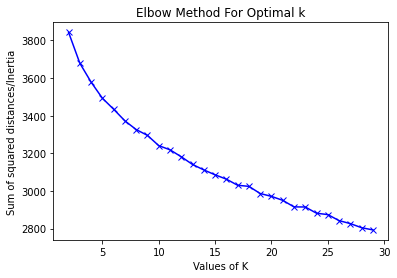

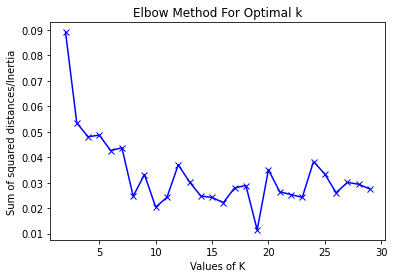

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
silhouette_avg = []#1 IS GOOD 0 IS BAD 

range_n_clusters = list(range(2,30))
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
           ).fit(sentence_vectors)
   
    # sum of squared distances
    Sum_of_squared_distances.append(kmeans.inertia_)
    # silhouette score
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(sentence_vectors, cluster_labels))

plt.plot(range_n_clusters,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

plt.plot(range_n_clusters,silhouette_avg ,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#report data when k = 7
kmeans = KMeans(n_clusters=7,
           ).fit(sentence_vectors)
cluster_labels = kmeans.labels_

data['label'] = cluster_labels 

#display  the value of 
#pd.set_option('max_colwidth', 100)

from collections import Counter
print(Counter(data.label))
data[data.label==1]['Lemmatized Items']

Counter({0: 182, 6: 134, 1: 129, 5: 126, 4: 125, 3: 105, 2: 88})


5                 thought much inconsistency application
6           imagine people learn use application quickly
8                       felt confident using application
10                                    practicing way fun
12                      felt engaged learning practicing
                             ...                        
816           able learn utilize tui application quickly
825    critical error encountered stopped completing ...
848                student always know moment simulation
872    use simulation easily retained student memory ...
878                                    encouragement use
Name: Lemmatized Items, Length: 129, dtype: object

In [ ]:
#save cluster0 as csv
#data[data.label==0]['Lemmatized Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/newcluster0.csv',index=False)

In [ ]:
#Populate clusters into different sheets in one excel file
with pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/HW/data/nestedclusters.xlsx') as writer:
 for i in range(0,7):
  data[data.label==i]['Lemmatized Items'].to_excel(writer, sheet_name='cluster'+str(i))

In [ ]:
#vectorize original items
from gensim.models import Word2Vec

#token_list = data['Tokenized Items'].values
token_list = data['Actual Items'].apply(nltk.word_tokenize).values 

import gensim.downloader
from pprint import pprint # pretty print 
pprint(list(gensim.downloader.info()['models'].keys())) #these are all the list of pre-trained wored embeddings available 

vectorizer = gensim.downloader.load('glove-wiki-gigaword-100') 
# let's use the gensim vectorization trained with gigaword with the dimension of 50
# in order to use this vectorizer (or locate the vector for a particular token ==> vectorizer['TOKEN'] )

sentence_vectors = []
for sentence in token_list: 
  v = []
  for word in sentence:
    try: 
      v.append(vectorizer[word])
    except:
      v.append(np.zeros(100,)) # this should change to the number that matches your final embedding size 
  sentence_vectors.append(v)

len(sentence_vectors)
sentence_vectors = [np.mean(k, axis=0) for k in sentence_vectors]


['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']


Moving on to k-means clustering

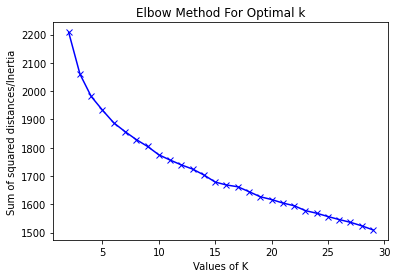

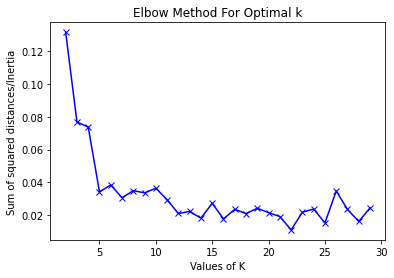

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
silhouette_avg = []#1 IS GOOD 0 IS BAD 

range_n_clusters = list(range(2,30))
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
           ).fit(sentence_vectors)
   
    # sum of squared distances
    Sum_of_squared_distances.append(kmeans.inertia_)
    # silhouette score
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(sentence_vectors, cluster_labels))

plt.plot(range_n_clusters,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

plt.plot(range_n_clusters,silhouette_avg ,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#report data when k = 5
kmeans = KMeans(n_clusters=5,
           ).fit(sentence_vectors)
cluster_labels = kmeans.labels_

data['label'] = cluster_labels 

#display  the value of 
#pd.set_option('max_colwidth', 100)

from collections import Counter
print(Counter(data.label))
data[data.label==2]['Actual Items']

Counter({1: 258, 2: 226, 4: 199, 0: 174, 3: 32})


7            i found the application very awkward to use
19     i will be more likely to practice catheter ins...
21       it was easy to concentrate on aseptic technique
35     i think that i would need the support of a tec...
39     i found the mobile ar application very cumbers...
                             ...                        
870                        the simulation is easy to use
872    use of the simulation is easily retained in th...
873    the structure is broad and students with avera...
874    the simulation is indicated to be used as an e...
878                                 encouragement to use
Name: Actual Items, Length: 226, dtype: object

In [ ]:
#save cluster0 as csv
data[data.label==0]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster0.csv',index=False)

In [ ]:
#save cluster1-4 as csv files
data[data.label==1]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster1.csv',index=False)
data[data.label==2]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster2.csv',index=False)
data[data.label==3]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster3.csv',index=False)
data[data.label==4]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster4.csv',index=False)

In [ ]:
#report data when k = 10
kmeans = KMeans(n_clusters=10,
           ).fit(sentence_vectors)
cluster_labels = kmeans.labels_

data['label'] = cluster_labels 

from collections import Counter
print(Counter(data.label))
data[data.label==0]['Actual Items']

Counter({6: 161, 4: 153, 7: 134, 9: 96, 2: 93, 8: 84, 3: 69, 0: 40, 1: 37, 5: 22})


88                            screen was not legible because of outdoor ambient light reflection or glare 
98                                  the quality of computergenerated graphics contents was very realistic 
99                           the quality of computergenerated graphics contents influenced my performance 
164    the images included in this learning material eg backgrounds of the menu of the opening display ...
168    the images and sounds of the learning material have a textual alternative definition images have...
228                                                                   uses aesthetic and minimalist design
231                                  the uses of text color and font follow the principles\nof readability
249                                                         clear and understandable structure of contents
263                                                            usage of multimedia elements are acceptable
264                                  

In [ ]:
data[data.label==0]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster0.csv',index=False)
data[data.label==1]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster1.csv',index=False)
data[data.label==2]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster2.csv',index=False)
data[data.label==3]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster3.csv',index=False)
data[data.label==4]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster4.csv',index=False)
data[data.label==5]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster5.csv',index=False)
data[data.label==6]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster6.csv',index=False)
data[data.label==7]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster7.csv',index=False)
data[data.label==8]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster8.csv',index=False)
data[data.label==9]['Actual Items'].to_csv('/content/drive/MyDrive/Colab Notebooks/HW/data/cluster9.csv',index=False)

In [ ]:
#report data when k = 18 but show cluster 17
kmeans = KMeans(n_clusters=18,
           ).fit(sentence_vectors)
cluster_labels = kmeans.labels_

data['label'] = cluster_labels 

from collections import Counter
print(Counter(data.label))
data[data.label==17]['Actual Items']

Counter({17: 115, 5: 97, 13: 92, 4: 75, 6: 68, 0: 64, 1: 57, 16: 57, 3: 44, 8: 41, 14: 39, 2: 39, 10: 37, 7: 34, 12: 14, 11: 11, 9: 4, 15: 1})


13     using this technology motivated me to keep pra...
21       it was easy to concentrate on aseptic technique
61               help students learn the course material
71     the effect of my interaction was easy to predict 
77       accurate pointing with gaze was easy to achieve
                             ...                        
777         the otels does not require much time to load
784    menu titles are brief yet long enough to commu...
816    i was able to learn to utilize the tui applica...
826    i am satisfied with the ease of learning to us...
846    the simulation presents students with question...
Name: Actual Items, Length: 115, dtype: object

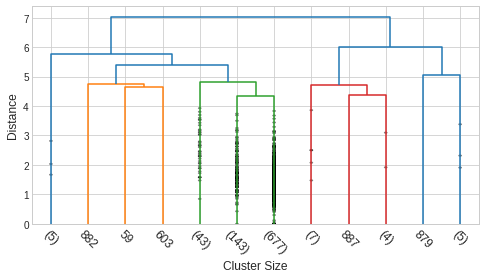

Counter({2: 677,
         5: 143,
         8: 5,
         9: 1,
         0: 43,
         4: 4,
         3: 7,
         6: 1,
         1: 5,
         11: 1,
         7: 1,
         10: 1})

In [ ]:
import matplotlib.pyplot as plt # this is to plot our results 
from scipy.cluster.hierarchy import dendrogram, linkage # this is to define a linkage method
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 4))

################ Let's define a linkage method 


Z = linkage(sentence_vectors, 'complete') 

dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=-45.,
           leaf_font_size=12., show_contracted=True)

plt.xlabel('Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=30, linestyle='dashed')
plt.axhline(y=10, linestyle='dotted')
plt.show()

cluster = AgglomerativeClustering(n_clusters=12, 
                                  affinity='euclidean', 
                                  linkage= 'complete') #FIT AND LEARN MODEL 
ac_labels = cluster.fit_predict(sentence_vectors)

from collections import Counter
Counter(ac_labels)



#### 4. Preliminary Results

> Multiple analyses were conducted, as demonstrated in section 4.2. For example, k-means clustering was applied to the original, unprocess data and the processed data. Results were extracted at different values of k, such as k=5 and k=10, after running the algorithm on the original data. 

>When outputing five clusters, the following topics emerged:
>1. Visual Design & Aesthetics
2. Perceived Usefulness and Pedagogical Strategies
3. System Learnability
4. Functionality
5. System Ease-of-use

>When outputing ten clusters, the following topics emerged with duplicates:
>1. Visual Design & Aesthetics
2. System Usefulness
3. Learnability & Functionality
4. System Usefulness
5. Visual Design & Accessibility
6. Functionality
7. Satisfaction
8. System Ease-of-use
9. Learnability and System Usefulness
10. Pedagogical Strategies & Instructional Design


#### 5. Discussion and Future Directions

> Although the elbow method indicated that five clusters should be considered as primary results, it made more sense when ten clusters were extracted. Having duplicate topics from the ten clusters should not be viewed as a surprise, instead, it can be interpreted as the degree to which the focus on the duplicate topics were made in existing usability instruments. For example, the topic "System Usefulness" appeared one time when five clusters were outputed and three times when ten clusters were extracted, meaning that this one aspect of usability has been substantially emphasized when instruments were designed and developed. This preliminary finding is consistent with findings from the systematic literature review conducted by colleagues and myself. Out of the 15 topics derived from two rounds of analyses, it is obvious that the focus of usability instuments was put on technical performance of a given technology or system. 

>Using the unsupervised learning algorithm, K-means Clustering, seems to produce promising results in helping retrieve topics of items in existing usability instruments that have been applied to learning technologies. However, with the total number of items in the data set, it is difficult to derive topics when a cluster contains more than 200 items. Additionally, not all items organized in one cluster belong to the topic(s) derived. 

>Future directions include applying k-means clustering to the full data set (including more instruments), as preliminary findings seem promising in unveiling topics (foci) of usability assessed by existing instruments used in LDT. Furthermore, different models such as the Latent Dirichlet Allocation (LDA)and supervised learning techniques may be used to compare results.